In [12]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [13]:
# Constants
max_features = 10000  # Number of words to consider as features
maxlen = 200  # Max length of each sequence
embedding_size = 128
lstm_units = 64
batch_size = 32
epochs = 5

In [14]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [15]:
# Preprocess the data
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(LSTM(lstm_units))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 83s 132ms/step - loss: 0.0776 - accuracy: 0.9728 - val_loss: 0.5053 - val_accuracy: 0.8532
Epoch 2/5
625/625 [==============================] - 82s 131ms/step - loss: 0.0798 - accuracy: 0.9742 - val_loss: 0.5335 - val_accuracy: 0.8240
Epoch 3/5
625/625 [==============================] - 82s 132ms/step - loss: 0.0583 - accuracy: 0.9811 - val_loss: 0.5979 - val_accuracy: 0.8522
Epoch 4/5
625/625 [==============================] - 82s 131ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.6513 - val_accuracy: 0.8372
Epoch 5/5
625/625 [==============================] - 81s 129ms/step - loss: 0.0283 - accuracy: 0.9926 - val_loss: 0.7844 - val_accuracy: 0.8490


In [5]:
# Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accuracy)


782/782 [==============================] - 38s 48ms/step - loss: 0.4784 - accuracy: 0.8576
Test score: 0.4783812165260315
Test accuracy: 0.8575599789619446


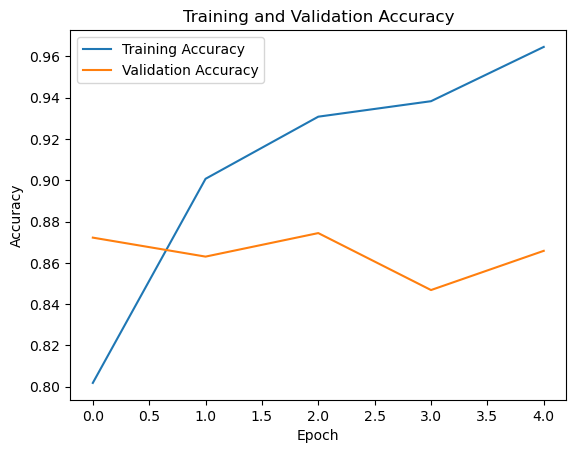

In [4]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [3]:
# Predictions
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype('int32')

# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


782/782 [==============================] - 40s 49ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

Confusion Matrix:
[[10615  1885]
 [ 1676 10824]]
